# Machine Learning para prevención de incendios forestales
[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/PedroBlanco23/MLRRNN/blob/main/aqua3.ipynb)

Firstly, we import and configure the packages needed to run this notebook 

In [ ]:
%conda env update -f environment.yml --prune

In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Now we define some constants to bound the geographic area we'll be working with

In [2]:
URLAT = -37.05
URLON = -56.8
LLLAT = -37.2
LLLON = -56.95
PINAMAR_EXTENT = [LLLON, URLON , LLLAT, URLAT]
X_GRIDS = 70
Y_GRIDS = 64

## Checking our model's performance

We already have a trained model (decision tree), so we load it as well as the dataset used during the training phase

In [3]:
model = joblib.load('model/model_dt.pkl')
dataset = pd.read_csv('dataset/fires.csv')

In [4]:
dataset.head()

dia_no_laboral   x   y         dc        dmc       ffmc       isi    ndvi  \
0               0  26  35  44.479923  13.657989  86.805050  3.683702  0.5409   
1               0  24  36  44.479923  13.657989  86.805050  3.683702  0.3943   
2               0  31  40  30.081812  10.990948  86.735850  5.233451  0.6410   
3               1  42  34   7.442470   3.905254  57.890266  1.619306  0.3821   
4               1  32  40   7.442470   3.905254  57.890266  1.619306  0.6049   

   elevacion  temperatura  humedad  viento  precipitaciones  superficie  \
0  13.999650        26.55     75.0    12.5              0.0           1   
1   8.742840        24.80     83.0     6.0              0.0           1   
2  19.189751        21.80     77.0    10.0              0.0           1   
3  10.651736        22.10     91.5     9.5              6.0           1   
4  17.995533        22.10     91.5     9.5              6.0           1   

   dia_0  dia_1  dia_2  dia_3  dia_4  dia_5  dia_6  mes_1  mes_2  mes_3  \
0      0      1      0      0      0      0      0      0      1      0   
1      0      1      0      0      0      0      0      0      1      0   
2      0      1      0      0      0      0      0      0      1      0   
3      0      0      0      0      0      0      1      0      1      0   
4      0      0      0      0      0      0      1      0      1      0   

   mes_4  mes_5  mes_6  mes_7  mes_8  mes_9  mes_10  mes_11  mes_12  hora_0-8  \
0      0      0      0      0      0      0       0       0       0         1   
1      0      0      0      0      0      0       0       0       0         0   
2      0      0      0      0      0      0       0       0       0         1   
3      0      0      0      0      0      0       0       0       0         1   
4      0      0      0      0      0      0       0       0       0         1   

   hora_8-16  hora_16-23  
0          0           0  
1          0           1  
2          0           0  
3          0           0  
4          0           0

We now take a look at our model's predictions

In [5]:
y = dataset.pop('superficie')
X = dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
y_predicted = model.predict(X_test) 
y_predicted

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

And evaluate its accuracy, precision and recall

In [6]:
classification_report_df = pd.DataFrame(classification_report(y_test, y_predicted, digits=2, output_dict=True, target_names=['No fire', 'Fire'])).T
classification_report_df.pop('support')
format_labels = lambda series: series.apply(lambda x: '{:.1%}'.format(x)) 
classification_report_df = classification_report_df.apply(format_labels, axis=1)
classification_report_df

precision recall f1-score
No fire          86.5%  73.2%    79.3%
Fire             76.4%  88.4%    82.0%
accuracy         80.7%  80.7%    80.7%
macro avg        81.5%  80.8%    80.6%
weighted avg     81.5%  80.7%    80.6%

## Getting predictions for a particular date

Now we want to get the fire predictions for a particular date: **26/11/2021**. We already have a file generated by a data pipeline which contains all features.

In [7]:
november_data = pd.read_csv('dataset/november_data.csv')
november_data.head()

Dia no laboral  x  y         dc        dmc       ffmc       isi    ndvi  \
0             0.0  0  0  79.965454  10.073426  65.134094  1.310078  0.2018   
1             0.0  1  0  79.965454  10.073426  65.134094  1.310078  0.2172   
2             0.0  2  0  79.965454  10.073426  65.134094  1.310078  0.2274   
3             0.0  3  0  79.965454  10.073426  65.134094  1.310078  0.2424   
4             0.0  4  0  79.965454  10.073426  65.134094  1.310078  0.2424   

   temperatura  humedad  viento  precipitaciones  Dia_0.0  Dia_1.0  Dia_2.0  \
0         23.0     52.0    20.0              0.0        0        0        0   
1         23.0     52.0    20.0              0.0        0        0        0   
2         23.0     52.0    20.0              0.0        0        0        0   
3         23.0     52.0    20.0              0.0        0        0        0   
4         23.0     52.0    20.0              0.0        0        0        0   

   Dia_3.0  Dia_4.0  Dia_5.0  Dia_6.0  Mes_1.0  Mes_2.0  Mes_3.0  Mes_4.0  \
0        0        1        0        0        0        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        1        0        0        0        0        0        0   
3        0        1        0        0        0        0        0        0   
4        0        1        0        0        0        0        0        0   

   Mes_5.0  Mes_6.0  Mes_7.0  Mes_8.0  Mes_9.0  Mes_10.0  Mes_11.0  Mes_12.0  \
0        0        0        0        0        0         0         1         0   
1        0        0        0        0        0         0         1         0   
2        0        0        0        0        0         0         1         0   
3        0        0        0        0        0         0         1         0   
4        0        0        0        0        0         0         1         0   

   Hora_0-8  Hora_8-16  Hora_16-23  elevacion  
0         0          1           0  16.132919  
1         0          1           0  13.993334  
2         0          1           0  13.414730  
3         0          1           0  10.610284  
4         0          1           0  12.200410

Now we get the fire predictions

In [8]:
X = november_data
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
predictions = model.predict(X) 
predictions_grid = predictions.reshape(Y_GRIDS + 1, X_GRIDS + 1)
predictions_df = pd.DataFrame(predictions_grid)
predictions_df

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
1    1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
2    1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
3    1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
4    1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
5    1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
6    1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
7    1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8    1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9    1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
10   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
12   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
13   1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
14   0   0   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
15   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
21   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
22   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
23   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
24   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
25   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
26   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
27   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
28   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
29   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
30   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
31   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
32   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
33   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
34   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
35   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
36   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
37   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
38   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
39   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
40   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
41   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
42   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
43   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
44   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
45   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
46   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
47   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
48   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
50   0   0   0   0   0   0

As it's difficult to interpret this predictions' grid, we will represent it on a map.
We will also ignore predictions for coordinates outside our area of interest

In [9]:
from shapely.ops import transform, cascaded_union
from shapely.geometry import Point, Polygon
import json
from pathlib import Path

latitude_bins = np.linspace(LLLAT, URLAT, num=(Y_GRIDS + 1))
longitude_bins = np.linspace(LLLON, URLON, num=(X_GRIDS + 1))
values = np.argwhere(predictions_grid > 0)
x = [latitude_bins[i[0]] for i in values]
y = [longitude_bins[i[1]] for i in values]
fires = list(zip(y, x))
with (Path('configuration/base_configuration.json')).open() as params_file:
    params = json.load(params_file)
    polygon_coordinates = params['polygon']
    latitudes = polygon_coordinates[1::2]
    longitudes = polygon_coordinates[::2]
    valid_area = Polygon(zip(longitudes, latitudes))
    coordinates = Polygon(zip(x, y))
    coordinates = valid_area - coordinates
    fires = list(filter(lambda coord: coordinates.contains(Point(coord)),fires))
x = [i[1] for i in fires]
y = [i[0] for i in fires]

Finally, we plot every prediction on a map

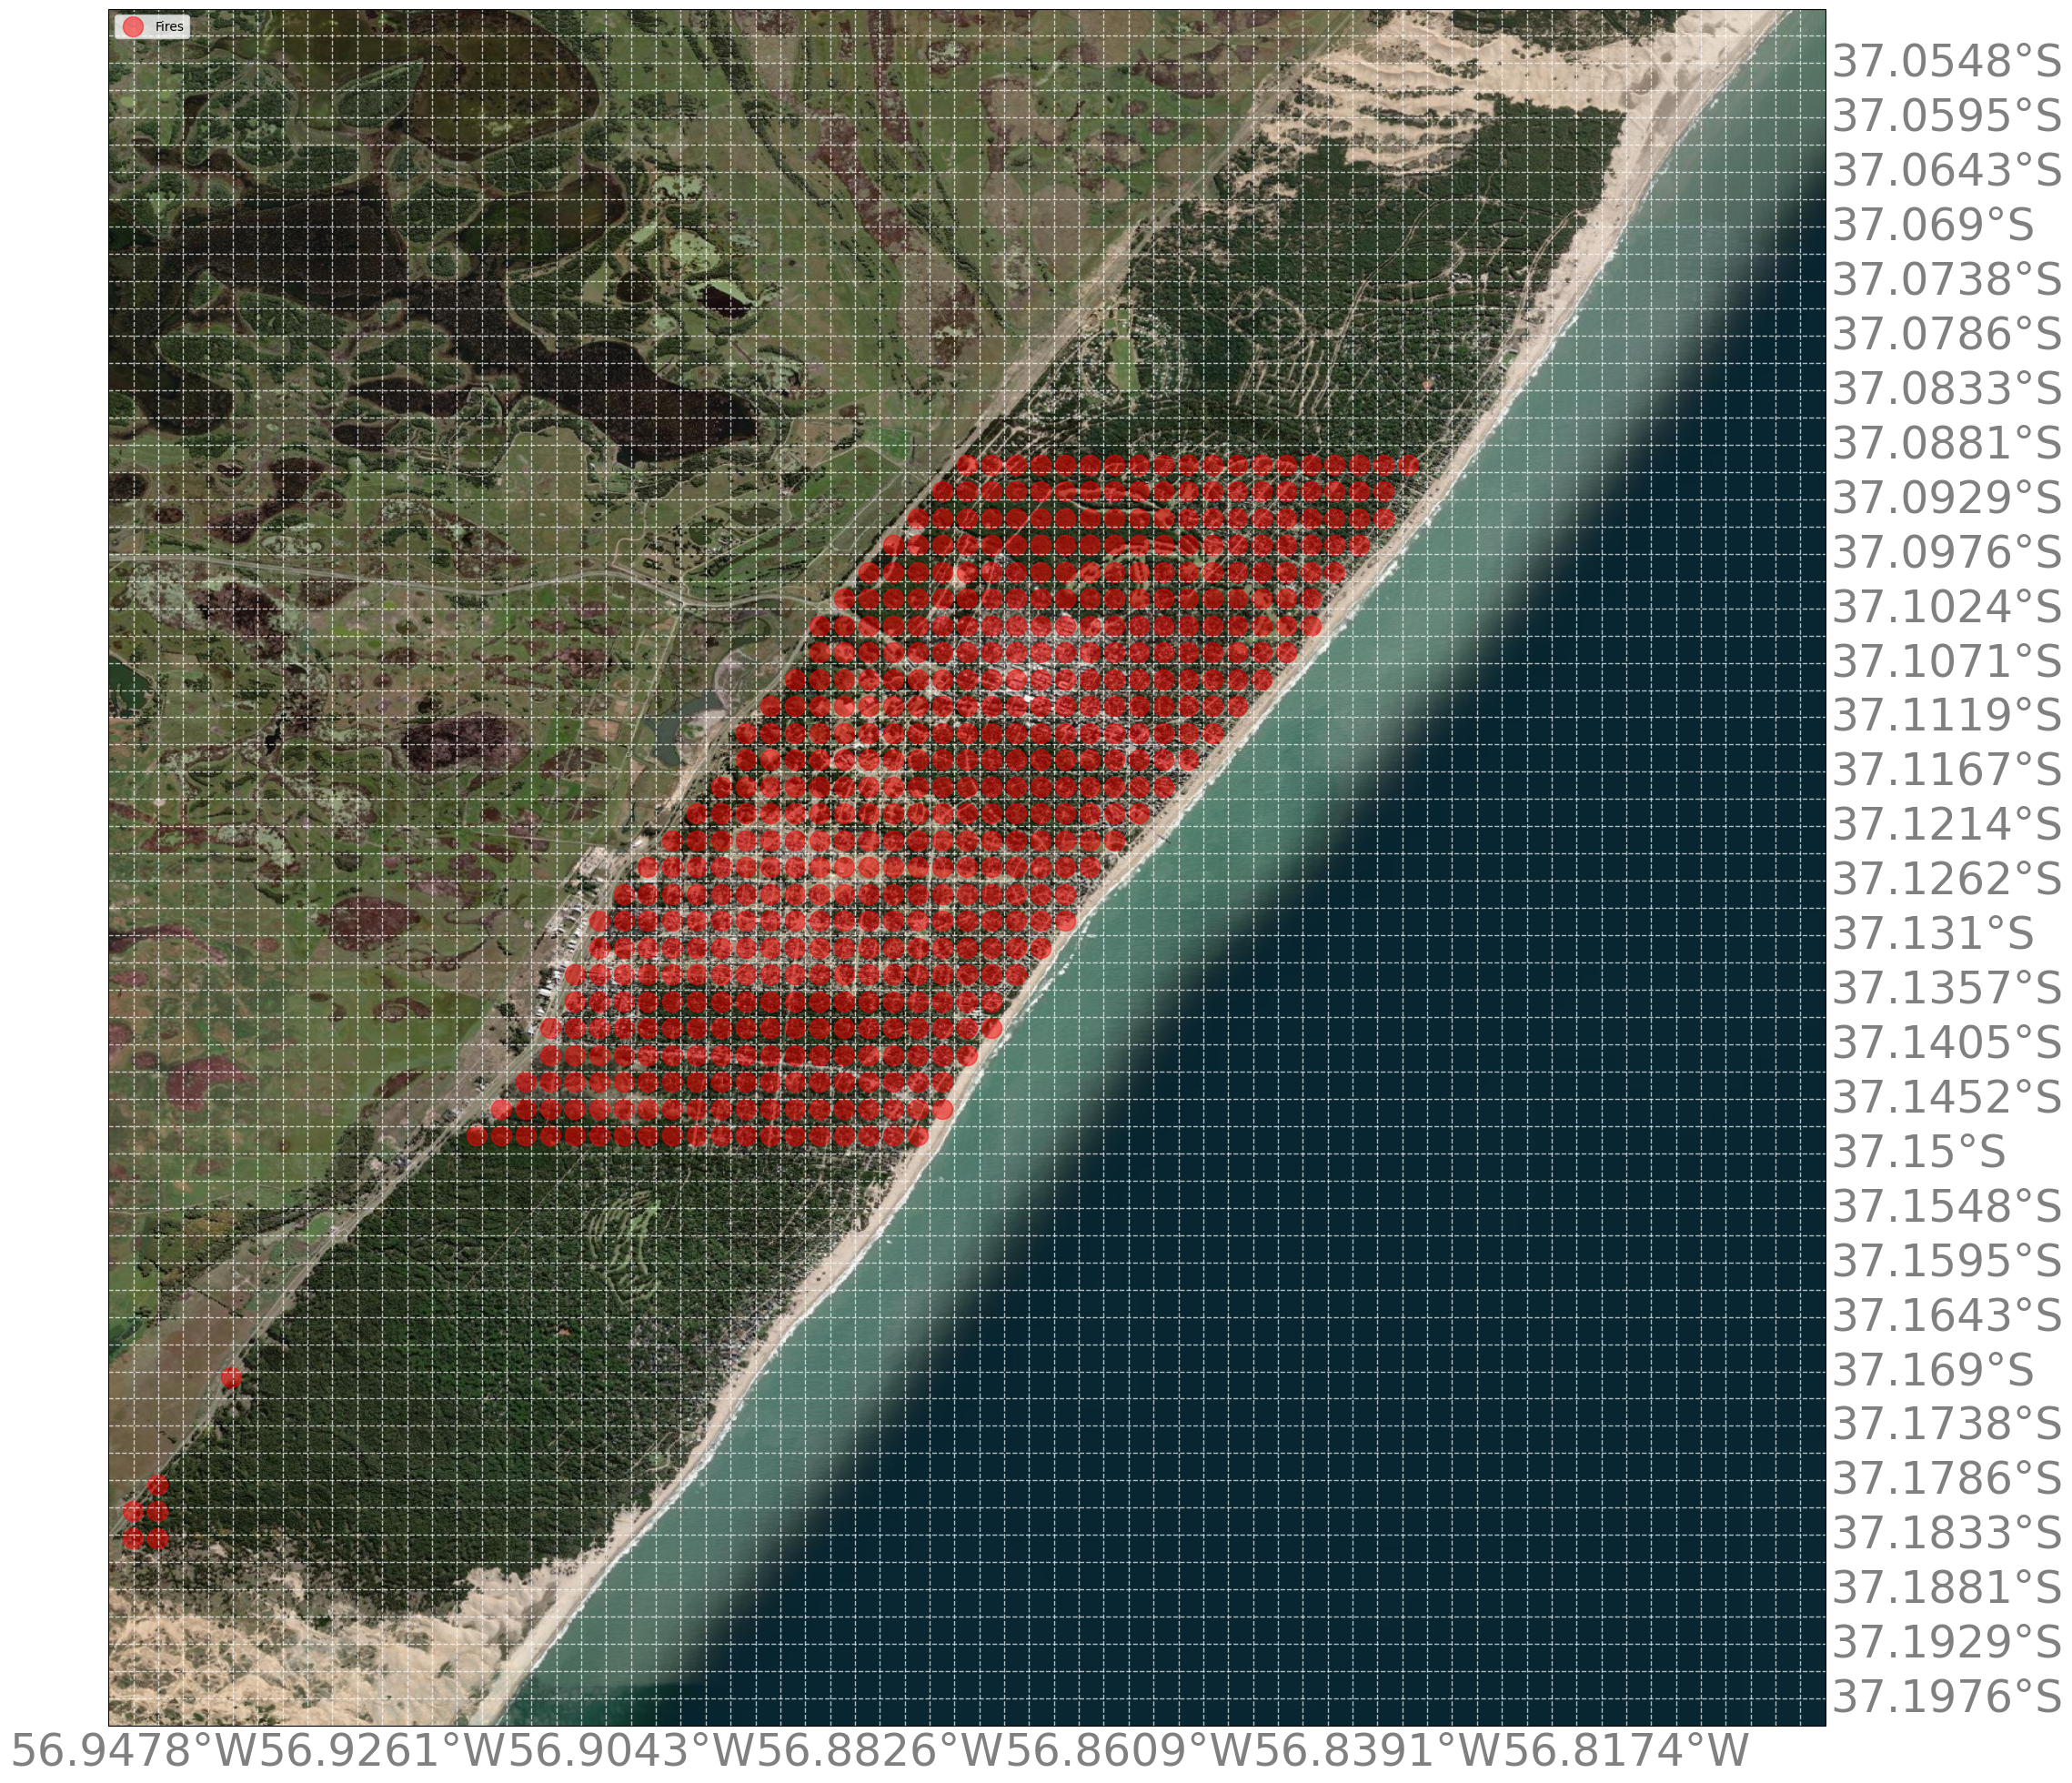

In [10]:
fig = plt.figure(figsize=(25, 25), dpi= 100)
img = plt.imread('images/pinamar.png')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(PINAMAR_EXTENT)
ax.imshow(img, origin='upper', extent=PINAMAR_EXTENT, transform=ccrs.PlateCarree())
ax.scatter(y, x, 250, c='r', alpha=0.5, label='Fires')
plt.legend(loc='upper left')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='white', alpha=0.7, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.linspace(LLLON, URLON, num=X_GRIDS))
gl.ylocator = mticker.FixedLocator(np.linspace(LLLAT, URLAT, num=Y_GRIDS))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 35, 'color': 'gray'}
gl.ylabel_style = {'size': 35, 'color': 'gray'}
plt.show()